# **Projeto de Doenças Cardiovasculares - Regressão Logística**


Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


O objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# Carregando e tratando a base de dados.



In [2]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [3]:
base.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0


In [4]:
## Verificar tipos e valores nulos

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [5]:
base.isnull().sum()


age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64

## Dados:

Nenhuma coluna tem valores nulos (.isnull().sum() deu tudo zero).

Todas as colunas têm 10.000 registros — ótimo!

## Problema identificado:

A coluna weight está como object (texto), mas deveria ser float ou int.

In [6]:
# Corrigir o tipo da coluna weight
base["weight"] = pd.to_numeric(base["weight"], errors="coerce")


In [8]:
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   gender          10000 non-null  int64  
 2   height          10000 non-null  int64  
 3   weight          9976 non-null   float64
 4   cholesterol     10000 non-null  int64  
 5   gluc            10000 non-null  int64  
 6   smoke           10000 non-null  int64  
 7   alco            10000 non-null  int64  
 8   active          10000 non-null  int64  
 9   cardio_disease  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [9]:
base["weight"].isnull().sum()


24

## Tratar valores ausentes em weight

Para essa etapa, vou tratar os valores preenchendo com a mediana


In [10]:
mediana = base["weight"].median()
base["weight"] = base["weight"].fillna(mediana)


In [11]:
base.isnull().sum()


age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64

# Análise exploratória de dados
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


### Doença cardiovascular por gênero

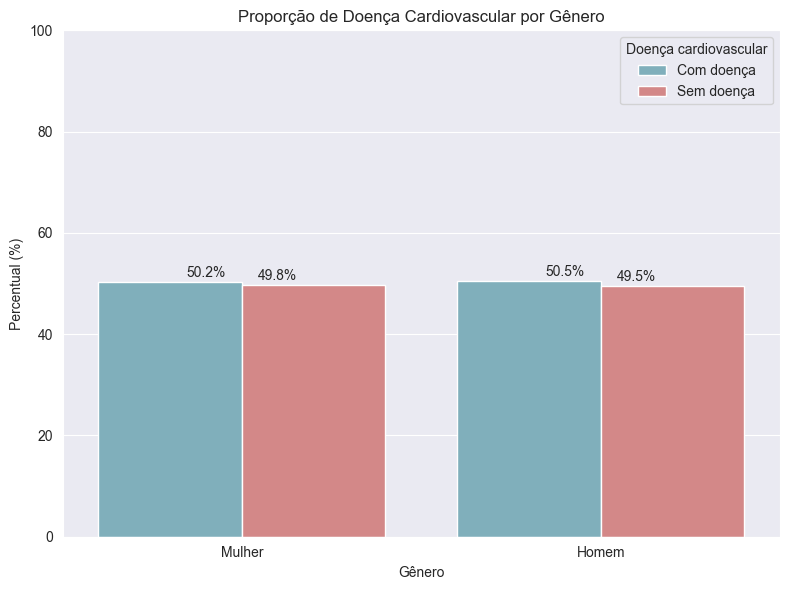

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular proporções por gênero
proporcao = (
    base.groupby("gender")["cardio_disease"]
    .value_counts(normalize=True)
    .rename("percentual")
    .mul(100)
    .reset_index()
)

# Substituir códigos por rótulos para leitura fácil
proporcao["gender"] = proporcao["gender"].replace({1: "Mulher", 2: "Homem"})
proporcao["cardio_disease"] = proporcao["cardio_disease"].replace({0: "Sem doença", 1: "Com doença"})

# Plotar gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=proporcao,
    x="gender",
    y="percentual",
    hue="cardio_disease",
    palette=["#76b5c5", "#e07b7b"]
)

# Adicionar rótulos de porcentagem
for i in range(len(proporcao)):
    row = proporcao.iloc[i]
    plt.text(
        x=i // 2 + (i % 2) * 0.2 - 0.1,
        y=row["percentual"] + 1,
        s=f'{row["percentual"]:.1f}%',
        ha='center'
    )

plt.title("Proporção de Doença Cardiovascular por Gênero")
plt.ylabel("Percentual (%)")
plt.xlabel("Gênero")
plt.ylim(0, 100)
plt.legend(title="Doença cardiovascular")
plt.tight_layout()
plt.show()




### insight: O gráfico mostra a proporção de pessoas com e sem doença cardiovascular para cada gênero. A diferença é muito pequena, com homens apresentando ligeiramente mais casos de doença (50,5%) que mulheres (50,2%). Isso indica que a doença cardiovascular está distribuída de forma bastante equilibrada entre os sexos nesta amostra.

### Distribuição da idade por presença de doença cardiovascular

C:\Users\karin\AppData\Local\Temp\ipykernel_44108\1005105445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cardio_disease", y="age", data=base, palette=["#76b5c5", "#e07b7b"])


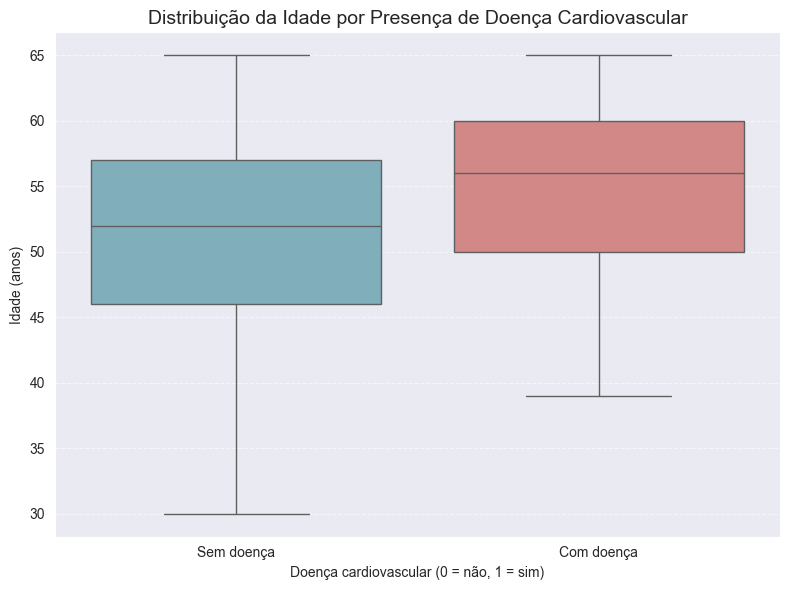

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="cardio_disease", y="age", data=base, palette=["#76b5c5", "#e07b7b"])

plt.title("Distribuição da Idade por Presença de Doença Cardiovascular", fontsize=14)
plt.xlabel("Doença cardiovascular (0 = não, 1 = sim)")
plt.ylabel("Idade (anos)")
plt.xticks([0, 1], ["Sem doença", "Com doença"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### insight: Pacientes com doença cardiovascular apresentam uma idade mediana mais alta que os pacientes sem a doença. Além disso, o intervalo interquartil também está deslocado para cima, reforçando que o risco de doença cardiovascular aumenta com a idade.

### Peso x Doença Cardiovascular

C:\Users\karin\AppData\Local\Temp\ipykernel_44108\3262842194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cardio_disease", y="weight", data=base, palette=["#76b5c5", "#e07b7b"])


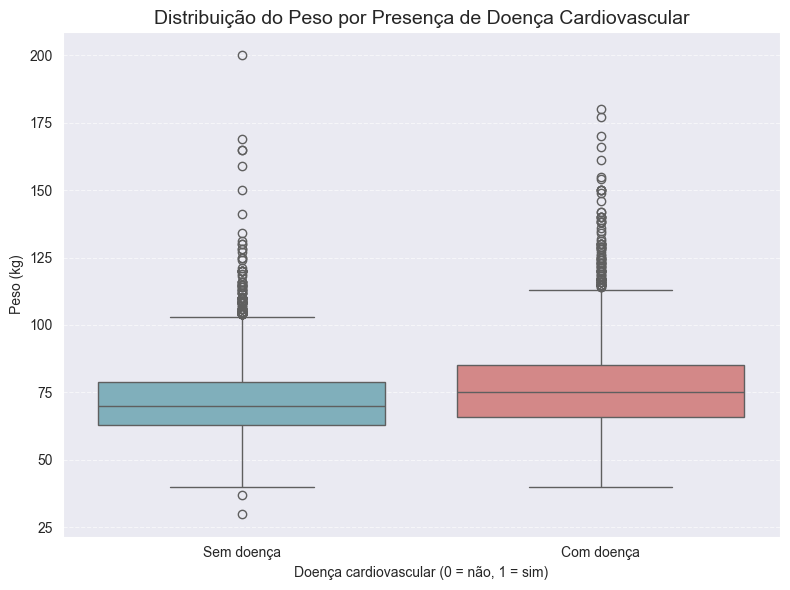

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="cardio_disease", y="weight", data=base, palette=["#76b5c5", "#e07b7b"])

plt.title("Distribuição do Peso por Presença de Doença Cardiovascular", fontsize=14)
plt.xlabel("Doença cardiovascular (0 = não, 1 = sim)")
plt.ylabel("Peso (kg)")
plt.xticks([0, 1], ["Sem doença", "Com doença"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




### insight: O gráfico mostra que pacientes com doença cardiovascular tendem a ter um peso ligeiramente mais elevado do que aqueles sem a doença. A mediana e a faixa interquartil estão deslocadas para cima no grupo com a doença, reforçando a associação entre excesso de peso e risco cardiovascular.

# matriz de correlação e insights acerca das variáveis com um relacionamento mais forte entre si.



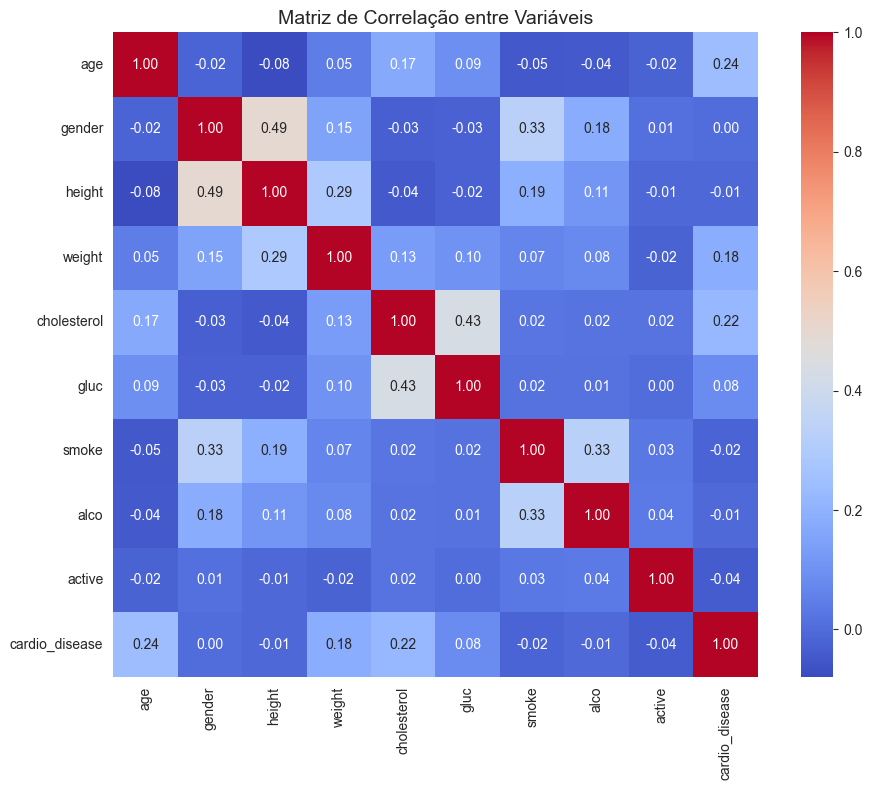

In [19]:
plt.figure(figsize=(10, 8))
corr = base.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação entre Variáveis", fontsize=14)
plt.tight_layout()
plt.show()


### interpretação: A matriz de correlação mostra que idade, colesterol, peso e glicose são os principais fatores correlacionados à presença de doença cardiovascular. A variável age tem a correlação mais forte com cardio_disease (0.24), o que reforça a hipótese de que o risco aumenta com o envelhecimento. Também observamos correlações relevantes entre algumas variáveis independentes, como cholesterol e gluc, e entre smoke e alco, o que pode indicar hábitos de saúde interligados.

# 4) Etapa pré modelo.


In [1]:
# Separação em treino e teste + correção de tipos
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregamento dos dados
df = pd.read_csv("CARDIO_BASE.csv", sep=";")

# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Corrigir valores com vírgula para ponto nas colunas numéricas, se houver
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Separar features (X) e target (y)
X = df.drop(columns='cardio_disease')
y = df['cardio_disease']

# Dividir base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Padronização dos dados

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Verificando o balanceamento dos dados

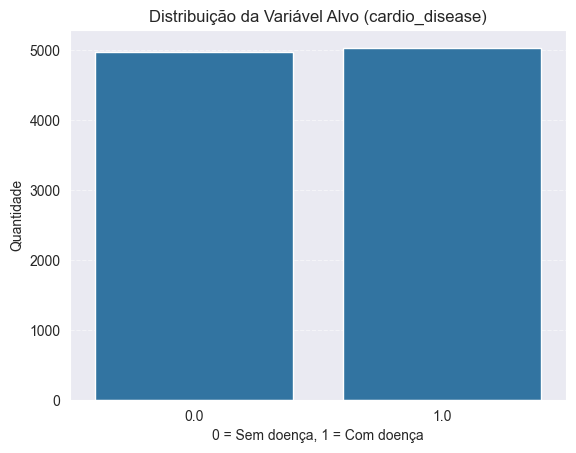

cardio_disease
1.0    0.503
0.0    0.497
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar a distribuição da variável-alvo
sns.countplot(x=y)
plt.title('Distribuição da Variável Alvo (cardio_disease)')
plt.xlabel('0 = Sem doença, 1 = Com doença')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Também exibe proporções
print(y.value_counts(normalize=True).round(3))


### Visualização das bases de treino/teste

In [4]:
# Visualizando dimensões dos conjuntos de treino e teste
print("Dimensões dos dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

# Verificando valores nulos
print("\nValores nulos nos dados de treino:")
print(pd.DataFrame(X_train).isnull().sum().sum())

print("\nValores nulos nos dados de teste:")
print(pd.DataFrame(X_test).isnull().sum().sum())


Dimensões dos dados:
X_train: (7000, 9)
X_test:  (3000, 9)
y_train: (7000,)
y_test:  (3000,)

Valores nulos nos dados de treino:
0

Valores nulos nos dados de teste:
0


# Treinamento do modelo:



### Treinamento do modelo

In [5]:
from sklearn.linear_model import LogisticRegression

# Instancia e treina o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# Intercepto
print(f"Intercepto: {modelo.intercept_[0]:.4f}")

# Coeficientes por variável
coeficientes = pd.Series(modelo.coef_[0], index=X_train.columns)
print("Coeficientes:")
print(coeficientes.sort_values(ascending=False).round(4))


Intercepto: -4.2106
Coeficientes:
cholesterol    0.5993
age            0.0657
alco           0.0502
weight         0.0239
gender         0.0112
height        -0.0096
gluc          -0.1121
smoke         -0.1199
active        -0.1941
dtype: float64


In [9]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Predições no conjunto de treino
y_train_pred = modelo.predict(X_train)

# Avaliação
print("Avaliação no Treino:\n")
print("Acurácia:           ", round(accuracy_score(y_train, y_train_pred), 4))
print("Precisão:           ", round(precision_score(y_train, y_train_pred), 4))
print("Revocação (Recall): ", round(recall_score(y_train, y_train_pred), 4))
print("F1-Score:           ", round(f1_score(y_train, y_train_pred), 4))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_train, y_train_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_train, y_train_pred))


Avaliação no Treino:

Acurácia:            0.6383
Precisão:            0.6457
Revocação (Recall):  0.617
F1-Score:            0.631

Matriz de Confusão:
[[2303 1188]
 [1344 2165]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65      3491
         1.0       0.65      0.62      0.63      3509

    accuracy                           0.64      7000
   macro avg       0.64      0.64      0.64      7000
weighted avg       0.64      0.64      0.64      7000



# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [10]:
# Previsões no conjunto de teste
y_test_pred = modelo.predict(X_test)


### Avaliando métricas do modelo treinado

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Avaliação no Teste:\n")
print("Acurácia:           ", round(accuracy_score(y_test, y_test_pred), 4))
print("Precisão:           ", round(precision_score(y_test, y_test_pred), 4))
print("Revocação (Recall): ", round(recall_score(y_test, y_test_pred), 4))
print("F1-Score:           ", round(f1_score(y_test, y_test_pred), 4))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_test_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))


Avaliação no Teste:

Acurácia:            0.639
Precisão:            0.6585
Revocação (Recall):  0.5992
F1-Score:            0.6275

Matriz de Confusão:
[[1005  473]
 [ 610  912]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      1478
         1.0       0.66      0.60      0.63      1522

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



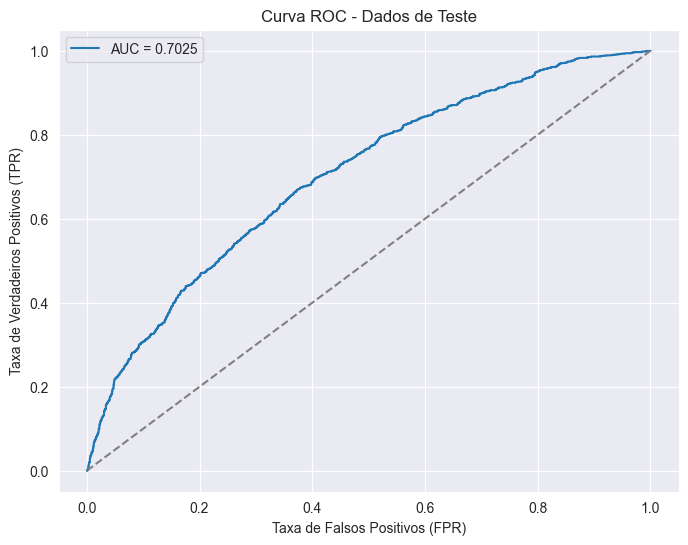

In [12]:
# curva AUC-ROC 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades para a classe 1
y_test_proba = modelo.predict_proba(X_test)[:, 1]

# Calcula FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

# Plotando a curva
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("Curva ROC - Dados de Teste")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()


### AUC = 0.7025
Isso significa que o modelo tem uma capacidade razoável de distinguir entre as classes (0 = sem doença, 1 = com doença).

# 7) Explique:

A) Explique com suas palavras regressão logistica.

Resposta: A regressão logística é um modelo estatístico utilizado para prever a probabilidade de ocorrência de um evento. Em vez de retornar um valor contínuo como a regressão linear, ela retorna a probabilidade de uma classe (por exemplo, doente ou não doente). Ela usa a função logística (sigmoide) para transformar os valores preditos em uma escala de 0 a 1, facilitando a classificação binária.

B) Explique porque a regressão logistica é um modelo de classificação.

Resposta: A regressão logística é considerada um modelo de classificação porque seu objetivo final é atribuir uma classe (como 0 ou 1) para cada observação, com base nas probabilidades estimadas. Por exemplo:

Se a probabilidade de ser da classe 1 for maior que 0.5, classificamos como 1 (com doença).

Caso contrário, classificamos como 0 (sem doença).

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.

Resposta: Ambas utilizam uma combinação linear das variáveis independentes (como β0 + β1X1 + β2X2...) e ajustam os coeficientes com base em uma função de custo. A principal diferença é que a regressão linear prevê valores contínuos, enquanto a logística usa a função sigmoide para prever probabilidades e realizar classificação.



# Conclusão Final do Estudo de Caso

### Após todas as etapas de exploração, modelagem e avaliação, podemos concluir que:

A regressão logística aplicada conseguiu um desempenho razoável para prever o risco de doenças cardiovasculares.

As métricas no conjunto de teste foram:

Acurácia: 0.639

F1-Score: 0.6275

AUC-ROC: 0.7025

O modelo conseguiu equilibrar bem a detecção dos dois grupos (com e sem doença).

Apesar de não ser um modelo perfeito, ele tem potencial para uso prático com algumas melhorias futuras (como feature engineering ou testes com outros algoritmos como Random Forest ou XGBoost).